In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
season_names = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_names)
df['day_type'] = df['workingday'].map({0: 'Вихідний', 1: 'Робочий'})

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [102]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

Text(0, 0.5, 'Кількість оренд')

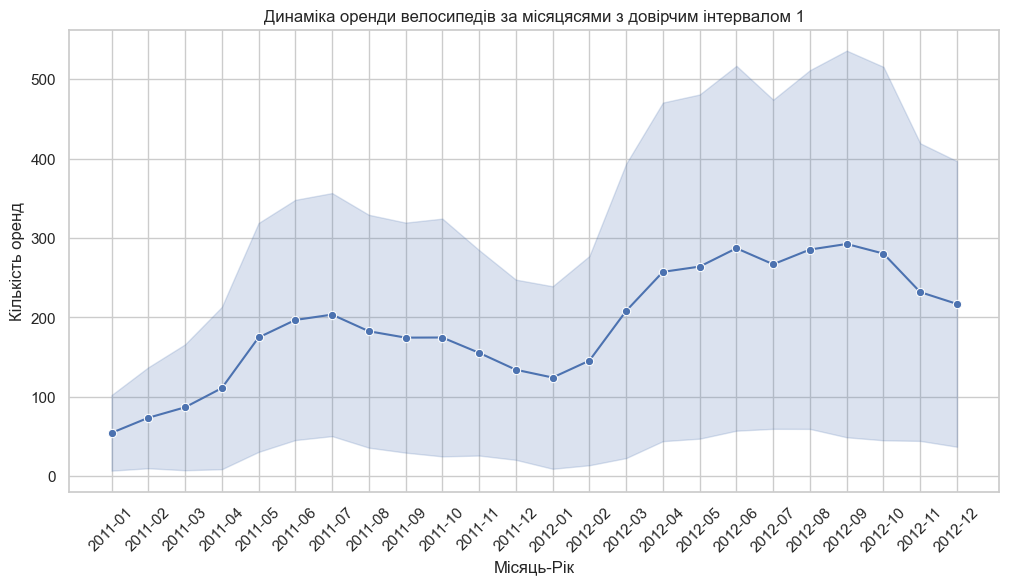

In [103]:

df['month_year']  = df.month_year.astype(str)


plt.figure(figsize=(12, 6))


sns.lineplot(data=df, x='month_year', y='count', errorbar='sd', marker='o' )

plt.xticks(rotation=45)
plt.title('Динаміка оренди велосипедів за місяцясями з довірчим інтервалом 1')
plt.xlabel('Місяць-Рік')
plt.ylabel('Кількість оренд')




- В які місяці найбільша невизначеність в даних?

Найбільша невизначеність приблизно в таких місяцях:

1. травень - липень 2021 

2. березень - вересень 2012

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

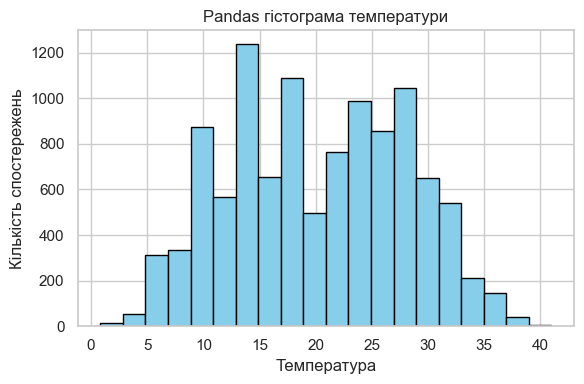

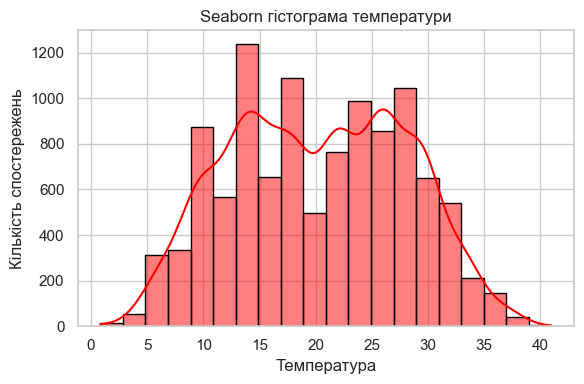

In [105]:
bin = 20

plt.figure(figsize=(6, 4))
df['temp'].plot.hist(bins=bin, color='skyblue', edgecolor='black')
plt.title('Pandas гістограма температури')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.tight_layout()
plt.show()

# Seaborn гістограма з KDE
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='temp', bins=bin, kde=True,  color='red',  edgecolor='black')
plt.title('Seaborn гістограма температури')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.tight_layout()
plt.show()

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?

Гістограми досить схожі

2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

Крива kde=True дозволяє побачити плавну зміну температур і її розподіл 

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


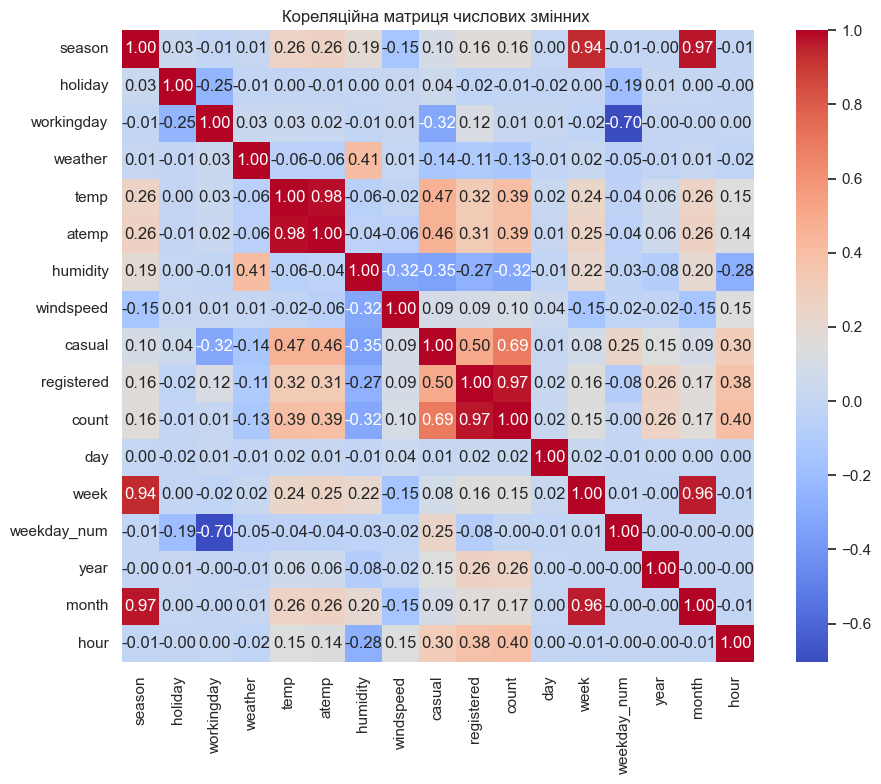

In [106]:
correlation_heatmap = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heatmap, cmap='coolwarm', square=True, annot=True, fmt=".2f" )
plt.title('Кореляційна матриця числових змінних ')
plt.tight_layout()
plt.show()


**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
    1.1 Registered має сильно позитивну кориляцію з count 
2. Яка кореляція між temp та atemp? Чому?
    2.1 також дсильно позитивна, тому що це показники однієї сутності (погоди), так вони можуть варіюватись, але відхилення в atemp не є значними 

3. Які змінні мають негативну кореляцію?
    3.1  humidity, weather мають негативну кореляцію, так як від погодо залежить бажання кататись 

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


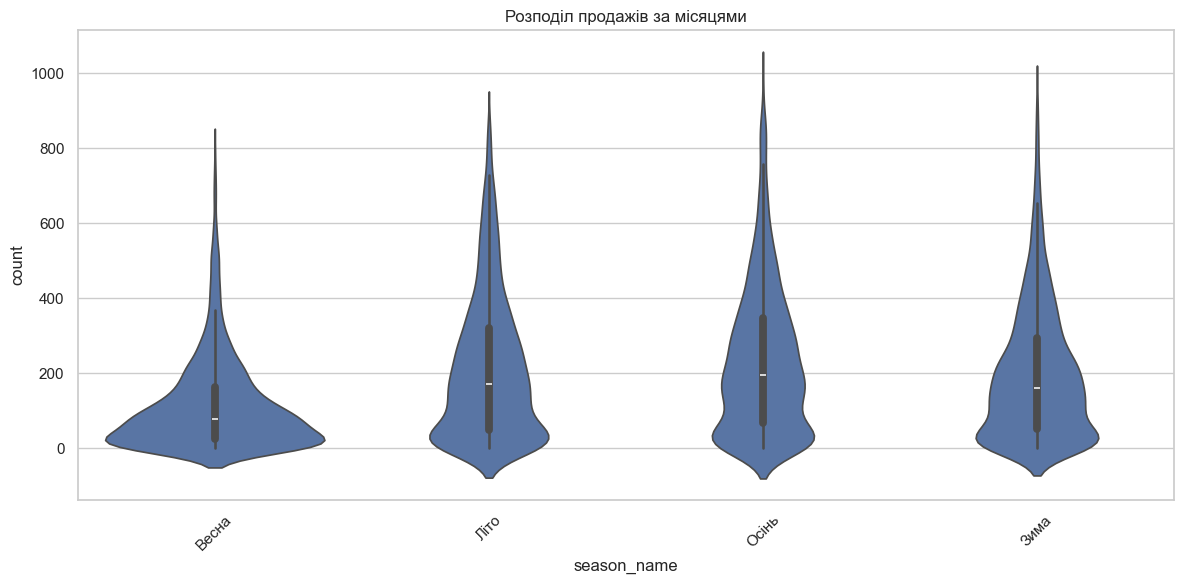

In [111]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='season_name', y='count')
plt.xticks(rotation=45)
plt.title('Розподіл продажів за місяцями')
plt.tight_layout()
plt.show()

In [109]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,month_year
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,2011-01


1. Що показує "товщина" violin plot?
    1.1 violin plot вказує на щільність даних у цьому діапазоні значень.
2. В якому сезоні найбільша варіабельність оренди?
    2.1 Виглядає так що відповідь Літо і Осінь, але літо все ж таки має ширший і рівншомірніший розподіл данних
3. Яка перевага violin plot над звичайним box plot?

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

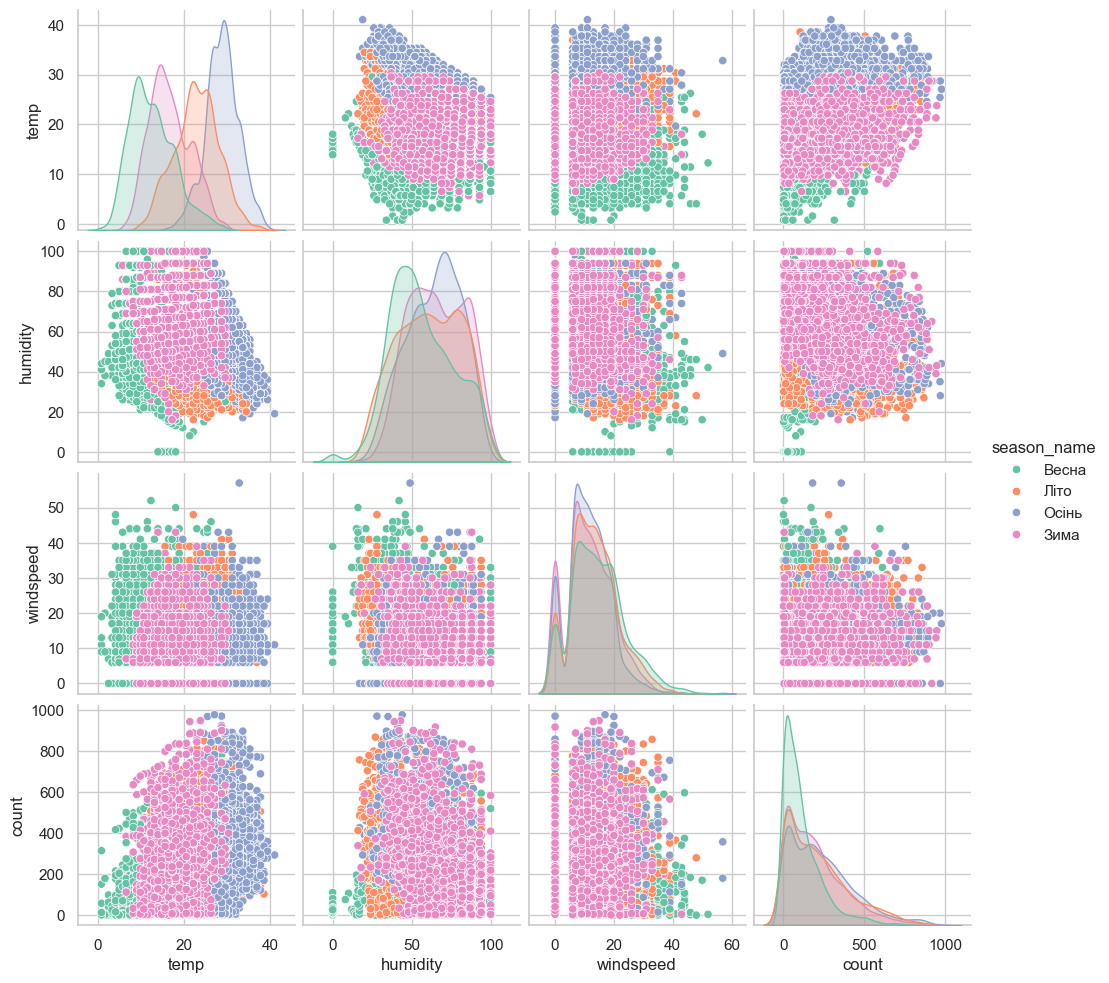

In [112]:
sns.pairplot(
    df[['temp', 'humidity', 'windspeed', 'count', 'season_name']],
    hue='season_name',
    palette='Set2',
    )


plt.show()

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?

temp та count


2. Яка характеристика найбільше змінюється від сезону?

temp

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

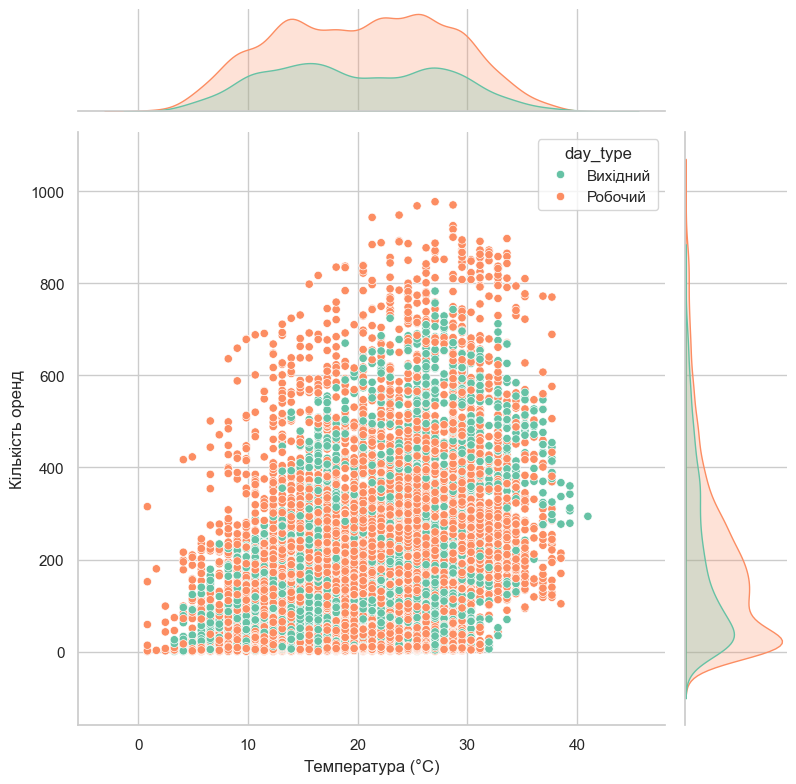

In [118]:


sns.jointplot(
    data=df,
    x='temp',
    y='count',
    hue='day_type',
    kind='scatter',
    palette='Set2',
    height=8
)
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')

plt.show()

1. Що показують графіки по краях?
   
    1.1 Зверху відображено при яких температурах найчастіше орендували велосипеди
    


2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

    2.1 У робочі дні (помаранчеві) більше оренд, особливо при високих температурах.

    2.2 У вихідні (зелені) — менше оренд і нижчі піки.
